In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### 성별 정수화

In [3]:
# train
train.loc[:, 'sex'].replace(' Male', 1, inplace=True)
train.loc[:, 'sex'].replace(' Female', 0, inplace=True)
# test
test.loc[:, 'sex'].replace(' Male', 1, inplace=True)
test.loc[:, 'sex'].replace(' Female', 0, inplace=True)

### 혼인 여부 정수화 (marital-status)

In [4]:
train['marital-status'][train['marital-status']!=' Married-civ-spouse'] = 0
train['marital-status'][train['marital-status']==' Married-civ-spouse'] = 1

test['marital-status'][test['marital-status']!=' Married-civ-spouse'] = 0
test['marital-status'][test['marital-status']==' Married-civ-spouse'] = 1

train['marital-status'] = train['marital-status'].astype('int64')
test['marital-status'] = test['marital-status'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\U

### relationship 정수화

In [5]:
train['relationship'][(train['relationship']!=' Husband') & (train['relationship']!=' Wife')] = 0
train['relationship'][(train['relationship']==' Husband') | (train['relationship']==' Wife')] = 1

test['relationship'][(test['relationship']!=' Husband') & (test['relationship']!=' Wife')] = 0
test['relationship'][(test['relationship']==' Husband') | (test['relationship']==' Wife')] = 1

train['relationship'] = train['relationship'].astype('int64')
test['relationship'] = test['relationship'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\U

In [6]:
data_all = pd.concat([train.iloc[:, :-1], test])

In [7]:
data_all.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,1,25,Private,219199,11th,7,0,Machine-op-inspct,0,White,1,0,0,40,United-States
1,2,39,Private,52978,Some-college,10,0,Other-service,0,White,0,0,1721,55,United-States
2,3,35,Private,196899,Bachelors,13,0,Handlers-cleaners,0,Asian-Pac-Islander,0,0,0,50,Haiti
3,4,64,Private,135527,Assoc-voc,11,0,Tech-support,0,White,0,0,0,40,United-States
4,5,24,Private,60783,Some-college,10,1,Transport-moving,1,White,1,0,0,70,United-States


### Capital 결합

In [8]:
data_all['capital-gain'] -= data_all['capital-loss']
del data_all['capital-loss']

In [9]:
del data_all['no']
del data_all['education']
del data_all['native-country']
del data_all['workclass']
del data_all['race']

In [10]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 9 columns):
age               48842 non-null int64
fnlwgt            48842 non-null int64
education-num     48842 non-null int64
marital-status    48842 non-null int64
occupation        48842 non-null object
relationship      48842 non-null int64
sex               48842 non-null int64
capital-gain      48842 non-null int64
hours-per-week    48842 non-null int64
dtypes: int64(8), object(1)
memory usage: 3.7+ MB


In [11]:
train_len = len(train)

In [12]:
one_hot_encoding = pd.get_dummies(data_all)

In [13]:
len(one_hot_encoding.columns)

23

In [14]:
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 23 columns):
age                              48842 non-null int64
fnlwgt                           48842 non-null int64
education-num                    48842 non-null int64
marital-status                   48842 non-null int64
relationship                     48842 non-null int64
sex                              48842 non-null int64
capital-gain                     48842 non-null int64
hours-per-week                   48842 non-null int64
occupation_ ?                    48842 non-null uint8
occupation_ Adm-clerical         48842 non-null uint8
occupation_ Armed-Forces         48842 non-null uint8
occupation_ Craft-repair         48842 non-null uint8
occupation_ Exec-managerial      48842 non-null uint8
occupation_ Farming-fishing      48842 non-null uint8
occupation_ Handlers-cleaners    48842 non-null uint8
occupation_ Machine-op-inspct    48842 non-null uint8
occupation_ Other-service  

In [15]:
train_d = one_hot_encoding[:train_len]
len(train_d)

29305

In [16]:
train_d = pd.concat([train_d, train['income']], axis=1)

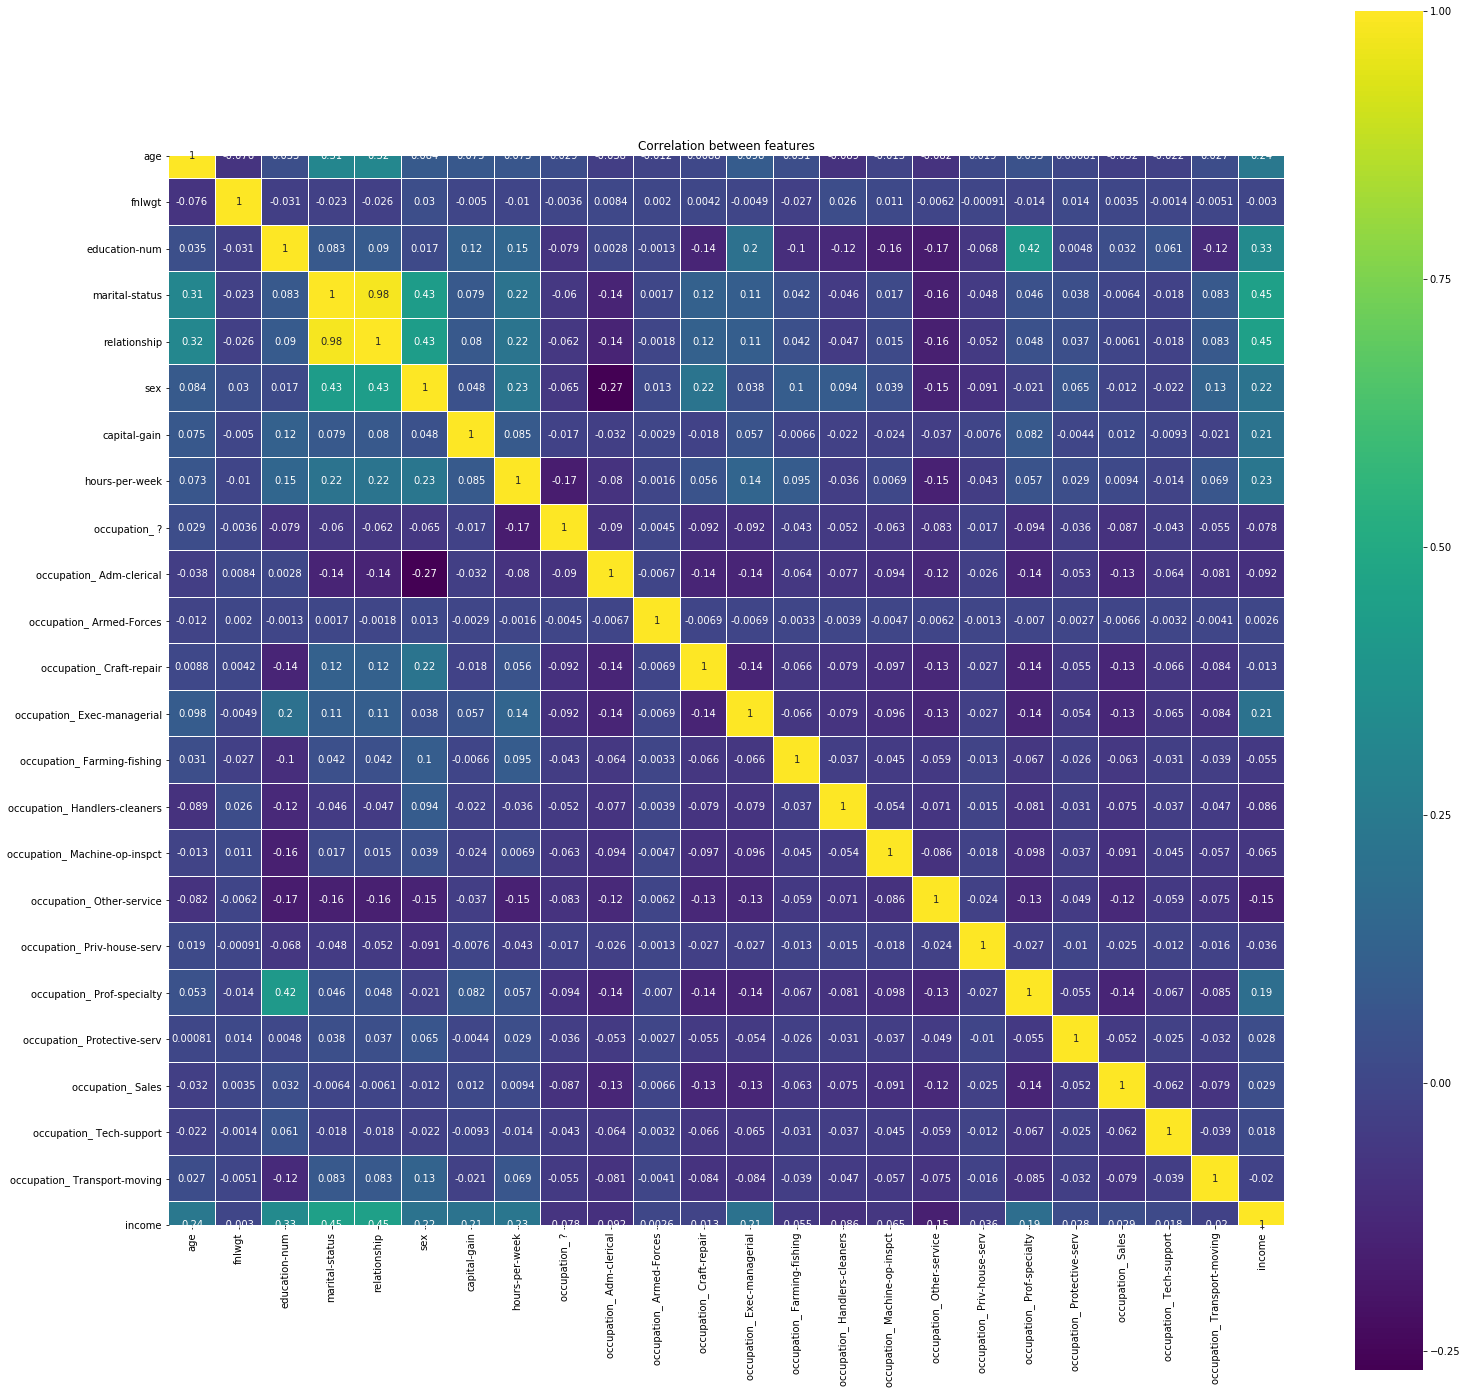

In [415]:
plt.figure(figsize=(25, 25))
sns.heatmap(train_d.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

### 데이터 전처리

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler
from sklearn.model_selection import train_test_split

In [17]:
X = train[['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
X_result = test[['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = train['income']

In [18]:
workclasses = train['workclass'].unique()

In [19]:
occupation = train['occupation'].unique()
occupation

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', ' ?', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

In [20]:
workclass = train[['workclass', 'occupation']]

In [21]:
ohe = pd.get_dummies(workclass)

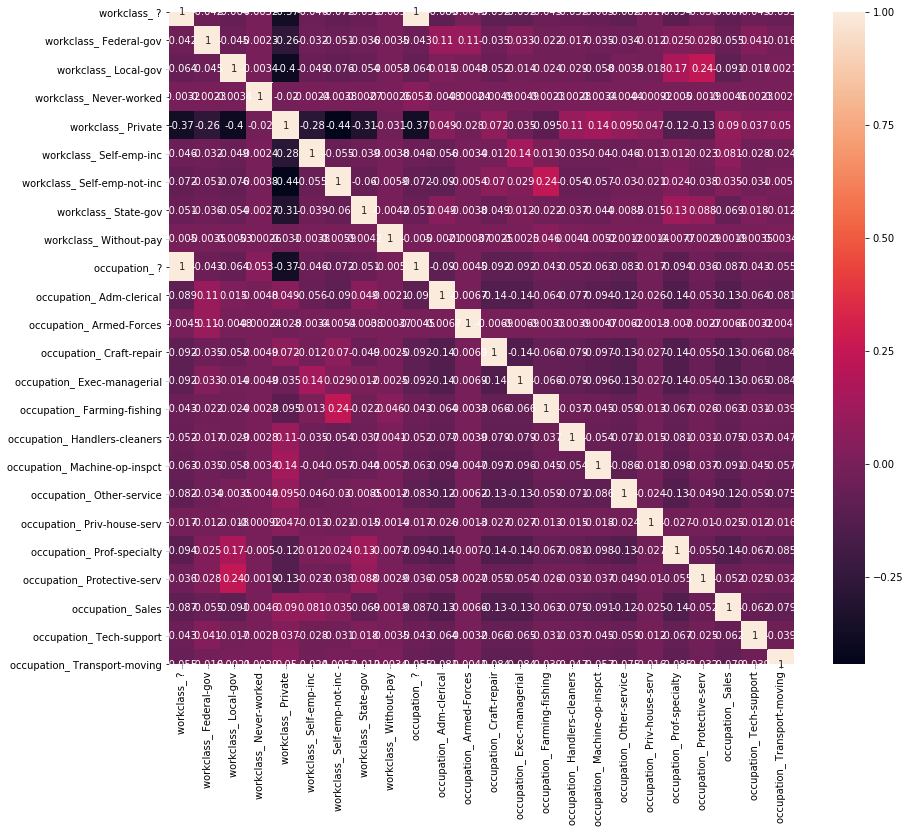

In [358]:
plt.figure(figsize=(14,12))
sns.heatmap(ohe.corr(), annot=True, linecolor="white")

In [22]:
for i in workclasses:
    print(workclass[workclass['workclass']==i].drop_duplicates())
    print()

    workclass          occupation
0     Private   Machine-op-inspct
1     Private       Other-service
2     Private   Handlers-cleaners
3     Private        Tech-support
4     Private    Transport-moving
6     Private      Prof-specialty
10    Private     Priv-house-serv
11    Private        Adm-clerical
26    Private               Sales
28    Private     Exec-managerial
33    Private        Craft-repair
57    Private     Protective-serv
190   Private     Farming-fishing

              workclass          occupation
5      Self-emp-not-inc     Farming-fishing
21     Self-emp-not-inc        Craft-repair
34     Self-emp-not-inc               Sales
41     Self-emp-not-inc     Exec-managerial
156    Self-emp-not-inc      Prof-specialty
225    Self-emp-not-inc        Adm-clerical
338    Self-emp-not-inc       Other-service
594    Self-emp-not-inc    Transport-moving
1245   Self-emp-not-inc        Tech-support
2073   Self-emp-not-inc   Handlers-cleaners
2215   Self-emp-not-inc   Machine-op-in

In [59]:
workclass['occupation'][workclass['workclass']==' Private'].value_counts().keys()

Index([' Craft-repair', ' Sales', ' Adm-clerical', ' Other-service',
       ' Exec-managerial', ' Prof-specialty', ' Machine-op-inspct',
       ' Handlers-cleaners', ' Transport-moving', ' Tech-support',
       ' Farming-fishing', ' Protective-serv', ' Priv-house-serv'],
      dtype='object')

In [60]:
workclass['occupation'][workclass['workclass']==' Private'].value_counts().values

array([2848, 2674, 2610, 2460, 2360, 2041, 1727, 1167, 1114,  687,  398,
        178,  146], dtype=int64)

In [82]:
workclass['occupation'][workclass['workclass']==' Private'].value_counts()

 Craft-repair         2848
 Sales                2674
 Adm-clerical         2610
 Other-service        2460
 Exec-managerial      2360
 Prof-specialty       2041
 Machine-op-inspct    1727
 Handlers-cleaners    1167
 Transport-moving     1114
 Tech-support          687
 Farming-fishing       398
 Protective-serv       178
 Priv-house-serv       146
Name: occupation, dtype: int64

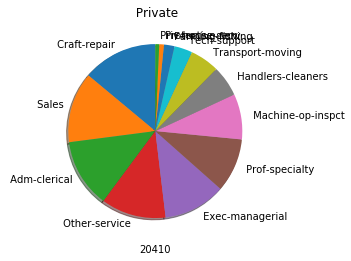

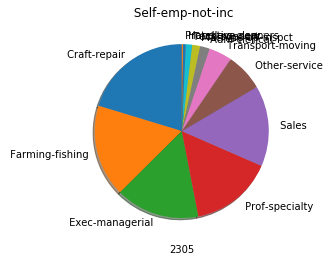

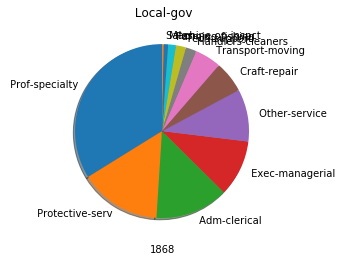

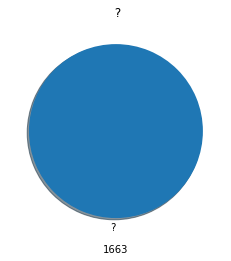

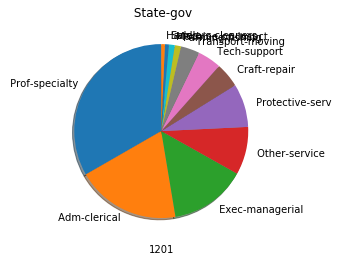

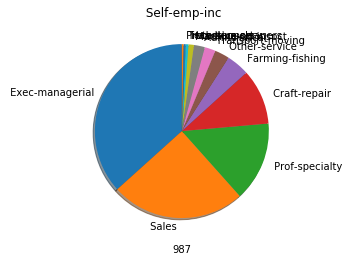

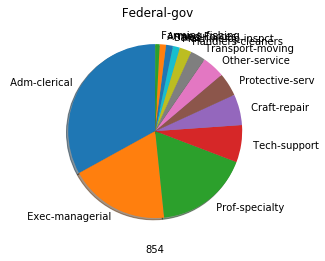

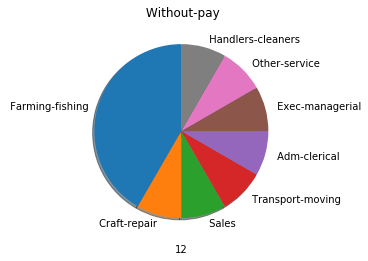

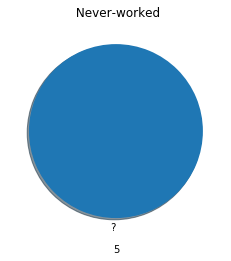

In [87]:
#f, ax = plt.subplots(9,1,figsize=(12,6))

for i in range(len(workclasses)):
    ratio = workclass['occupation'][workclass['workclass']==workclasses[i]].value_counts().values
    labels = workclass['occupation'][workclass['workclass']==workclasses[i]].value_counts().keys()
    plt.pie(ratio, labels=labels, shadow=True, startangle=90)
    #raw_data['income'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
    plt.title(workclasses[i])
    plt.xlabel(len(workclass['occupation'][workclass['workclass']==workclasses[i]]))
    plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()
#X_con = pd.concat([X, X_result])
sc.fit(one_hot_encoding)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
train_len

29305

In [28]:
X = one_hot_encoding[:train_len]
X_result = one_hot_encoding[train_len:]

In [29]:
X = sc.transform(X)
X_result = sc.transform(X_result)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y = train['income']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: income, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

### 모델 훈련
### SVC

In [330]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [331]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [332]:
print(poly_kernel_svm_clf.score(X_test, y_test))

0.8486123748862603


In [31]:
y_pred = svc.predict(X_result)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
y_pred = pd.DataFrame(y_pred, columns=['income'])

### RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=None, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

print(rnd_clf.score(X_train, y_train))
print(rnd_clf.score(X_test, y_test))

y_pred = rnd_clf.predict(X_result)

0.9999025008531175
0.8496360327570519


### Bagging

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=1000,
    max_samples=2000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
print(bag_clf.score(X_test, y_test))

0.8580527752502275


In [35]:
y_pred = bag_clf.predict(X_result)

## Deep Learning

### submission 파일 출력

In [347]:
y_pred = pd.DataFrame(y_pred, columns=['income'])

In [348]:
result = pd.concat([pd.DataFrame(list(range(29306, 48843)), columns=['no']), y_pred], axis=1)
result.to_csv('./submission.csv', index=False)